
## Techniques of Artificial Intelligence - 001600
 *Report based on implementation for Performance Evaluation of Machine Learning Methods for Breast Cancer Prediction.*

---
---
Project abstract:

Breast cancer is the most prevalent invasive cancer in women and the second leading cause of cancer mortality in women. Breast cancer can be categorized as benign or malignant. Breast cancer studies and treatment have piqued the interest of experts in recent years. In the other hand, the advancement of data mining techniques offers an important tool for extracting more valuable knowledge from complex databases, and some estimation, classification, and clustering can be rendered based on the extracted information.In this study, two different machine learning models, Random Forest (RF) and Neural Network (NN), was used for the classification of two different datasets related to breast cancer: Breast Cancer Coimbra Dataset (BCCD) and Wisconsin Breast Cancer Database, in order to investigate the relationship between breast cancer and certain attributes in order to reduce the death probability of breast cancer (WBCD). To assess the efficiency of these two classification models, three metrics are used: prediction accuracy values, the F-measure metric, and AUC values. A comparative experiment review reveals that the neural network paradigm outperforms the random forest models in terms of efficiency and adaptation.

As a result, the model of this research has been accepted for clinical and referential benefit in functional applications.


---


---

*Lecturer/s: Geraint A. Wiggins(geraint.wiggins@vub.be)*

*Teaching assistant/s: Isel Del Carmen Grau Garcia(isel.del.carmen.grau.garcia@vub.be)*

*Submitted by: Aneruth Mohanasundaram(aneruth.mohanasundaram@vub.be) 0573520*




## Importing packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Dataset Information 
---
---
For confirmation and demonstration, one dataset from the Breast Cancer Coimbra Dataset (BCCD) developed by Patrcio et al. [1], at the Faculty of Medicine of the University of Coimbra can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/00451/, and another dataset from the Wisconsin Breast Cancer Database (WBCD) created by Dr. William H. Wolberg, at the University of Wisconsin Hospitals, was used andcan be found at http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/.

## WBCD Attribute Information:

Eleven real-valued features are computed for each cell nucleus: 

1. Sample code number: id number 

2. Clump Thickness: 1 - 10 

3. Uniformity of Cell Size: 1 - 10 

4. Uniformity of Cell Shape: 1 - 10 

5. Marginal Adhesion: 1 - 10 

6. Single Epithelial Cell Size: 1 - 10 

7. Bare Nuclei: 1 - 10 

8. Bland Chromatin: 1 - 10 

9. Normal Nucleoli: 1 - 10 

10. Mitoses: 1 - 10 

11. Class: (2 for benign, 4 for malignant)

## Importing Datasets

In [2]:
bccd = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Implementation-of-breast-cancer-prediction-using-machine-learning-techniques./Datasets/BCCD.csv')
wbcd = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Implementation-of-breast-cancer-prediction-using-machine-learning-techniques./Datasets/breast-cancer-wisconsin',names=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'])

## In the above WBCD dataset columns can be found from the "***breast-cancer-wisconsin.names***" file.

# ***BCCD Dataset*** 

## Machine Learning Model for BCCD dataset.

## Root map
## 1 --> Healthy

## 2 --> Patient

In [3]:
# To check the head
bccd.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
# Renaming target values as 0 and 1 
bccd['Classification'] = bccd['Classification'].replace(1,0)
bccd['Classification'] = bccd['Classification'].replace(2,1)

In [5]:
# To check the value counts of the classification
bccd['Classification'].value_counts()

1    64
0    52
Name: Classification, dtype: int64

## Analysing dataset

<AxesSubplot:title={'center':'Confusion matrix of BCCD Dataset'}>

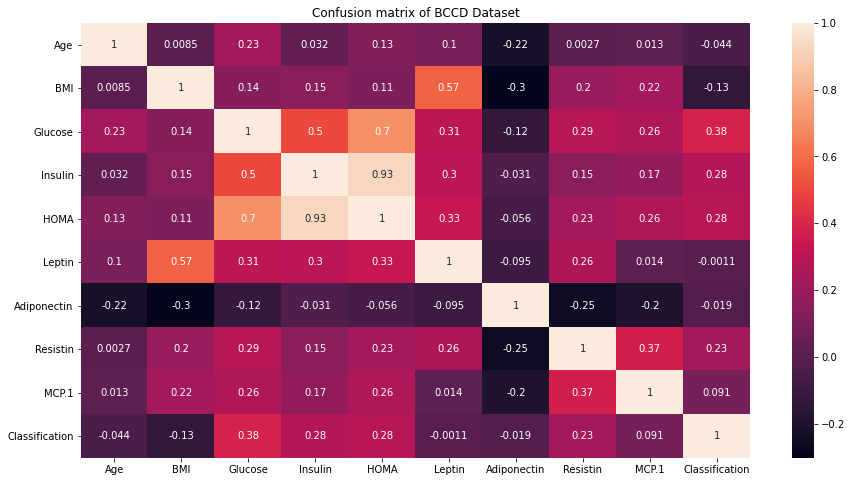

In [6]:
# To check correlation map
cor = bccd.corr()

# Plotting correlation map
plt.figure(figsize=(15,8))
plt.title('Confusion matrix of BCCD Dataset')
sns.heatmap(cor, annot = True)

## The above correlation matrix is provides us the relation between each columns present in our dataset. 

## Visualising our dataset

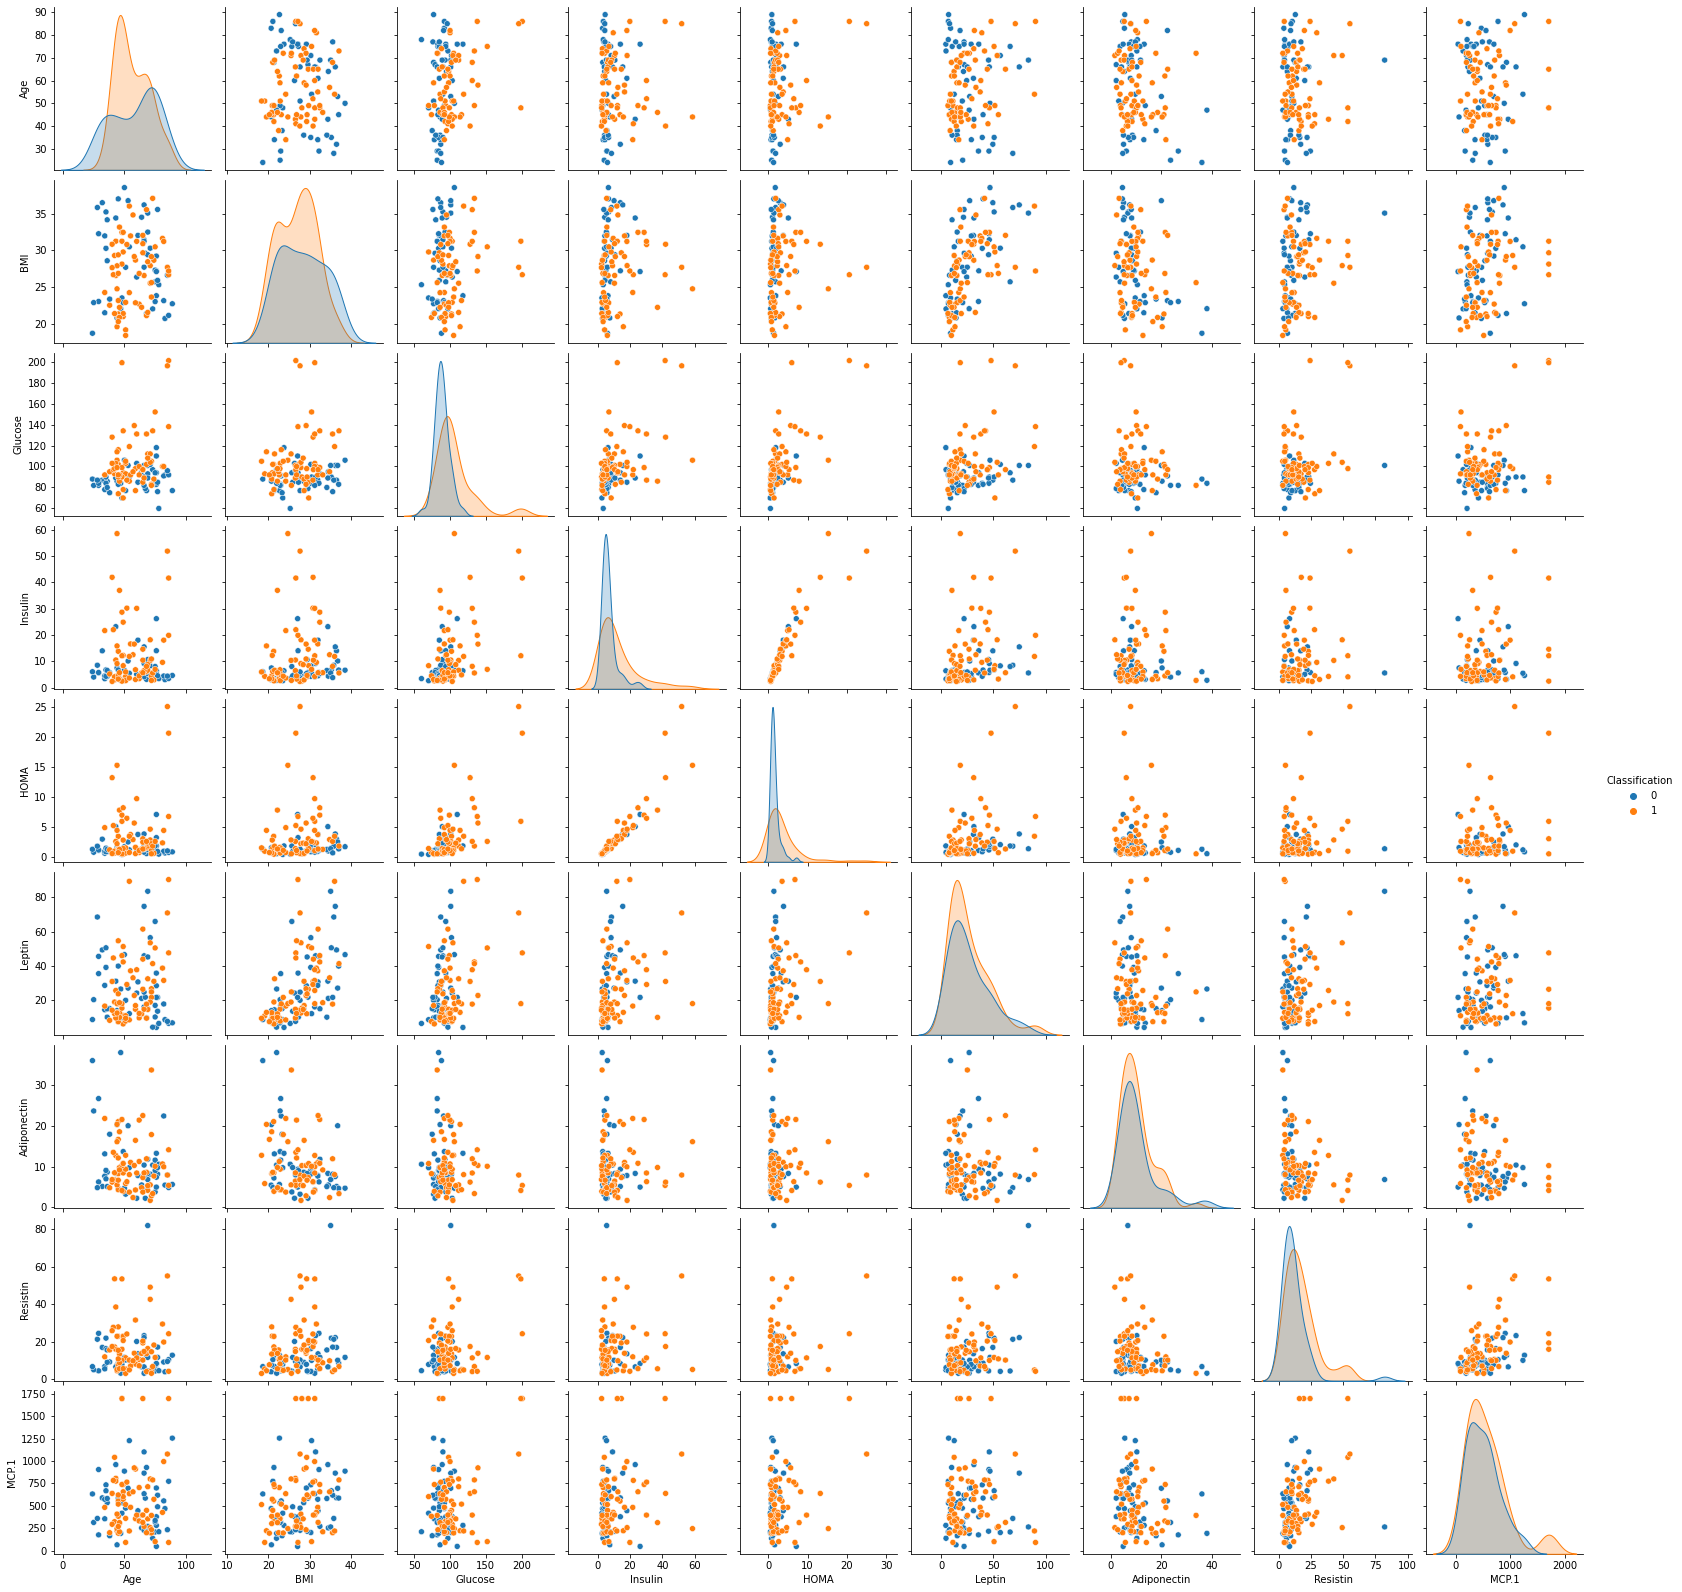

In [8]:
# Pairplot for our BCCD Dataset
sns.pairplot(data=bccd,diag_kind="kde",hue='Classification')

## Plotting the ditribution plot for our dataset

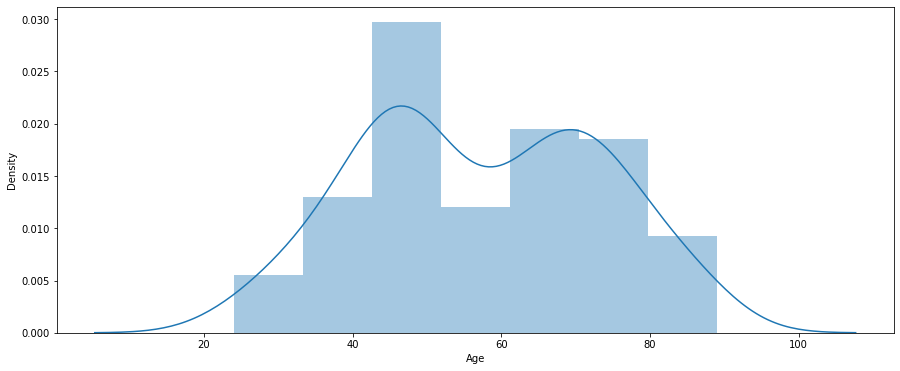

In [9]:
plt.figure(figsize=(15,6))
sns.distplot(bccd['Age'],kde=True)

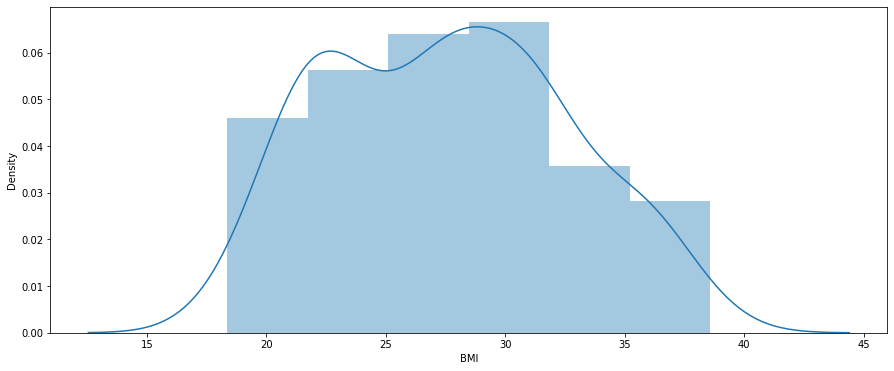

In [10]:
plt.figure(figsize=(15,6))
sns.distplot(bccd['BMI'],kde=True)

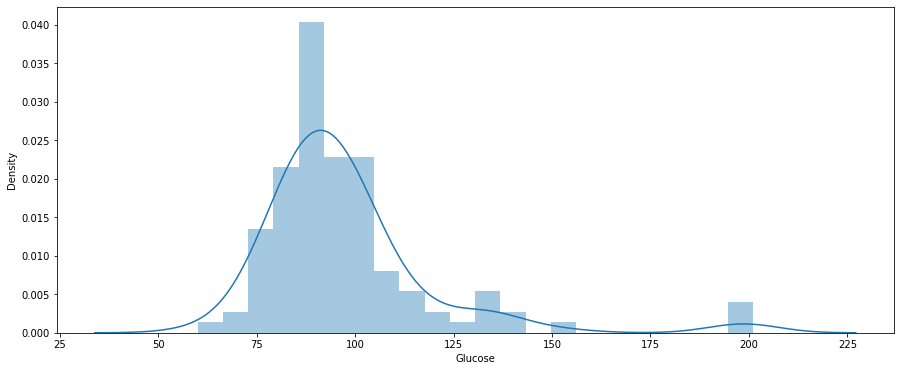

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(bccd['Glucose'],kde=True)

## Perform Machine Learning Stuff


### Train,Test and Split the dataset

In [7]:
X = bccd.drop('Classification',axis=1)
y = bccd['Classification']

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3,random_state=101)

## Random Forest

In [8]:
rm = RandomForestClassifier(n_estimators=100)

In [9]:
# Training the model
rm.fit(X_train,y_train)

# Predicting the model
rf_predict = rm.predict(X_test)

In [10]:
# Printing the Classification Report.
print('Classification Report for Random Forest:' + '\n\n' + classification_report(y_test,rf_predict))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        38
           1       0.69      0.84      0.76        43

    accuracy                           0.72        81
   macro avg       0.73      0.71      0.71        81
weighted avg       0.72      0.72      0.71        81



## Confusion Matrix for Random Forest (BCCD Dataset)

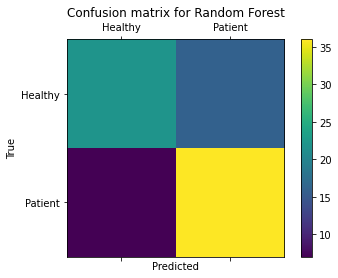

In [11]:
labels = ['Healthy', 'Patient']
cm = confusion_matrix(y_test, rf_predict)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for Random Forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# To print the accuracy score
acc = round((accuracy_score(y_test,rf_predict))*100,3)
print(f'The accuracy score for Random Forest model is {acc}% with the help conventional train test split using n_estimators as 100')

The accuracy score for Random Forest model is 71.605% with the help conventional train test split using n_estimators as 100


## Hyperparameterising our Random Forest Model 

In [13]:
acc = []
def hyperParameter(alist):
    for i in alist:
        rm = RandomForestClassifier(n_estimators=i)
        rm.fit(X_train,y_train)
        predict = rm.predict(X_test)
        acc.append(round(accuracy_score(y_test,predict)*100,2))
        print(f'Accuracy score at {i}th estimator is {round(accuracy_score(y_test,predict)*100,2)}')
hyperParameter([i for i in range(300,2000,100)])

Accuracy score at 300th estimator is 72.84
Accuracy score at 400th estimator is 71.6
Accuracy score at 500th estimator is 74.07
Accuracy score at 600th estimator is 74.07
Accuracy score at 700th estimator is 70.37
Accuracy score at 800th estimator is 75.31
Accuracy score at 900th estimator is 74.07
Accuracy score at 1000th estimator is 75.31
Accuracy score at 1100th estimator is 72.84
Accuracy score at 1200th estimator is 75.31
Accuracy score at 1300th estimator is 72.84
Accuracy score at 1400th estimator is 74.07
Accuracy score at 1500th estimator is 72.84
Accuracy score at 1600th estimator is 71.6
Accuracy score at 1700th estimator is 71.6
Accuracy score at 1800th estimator is 75.31
Accuracy score at 1900th estimator is 72.84


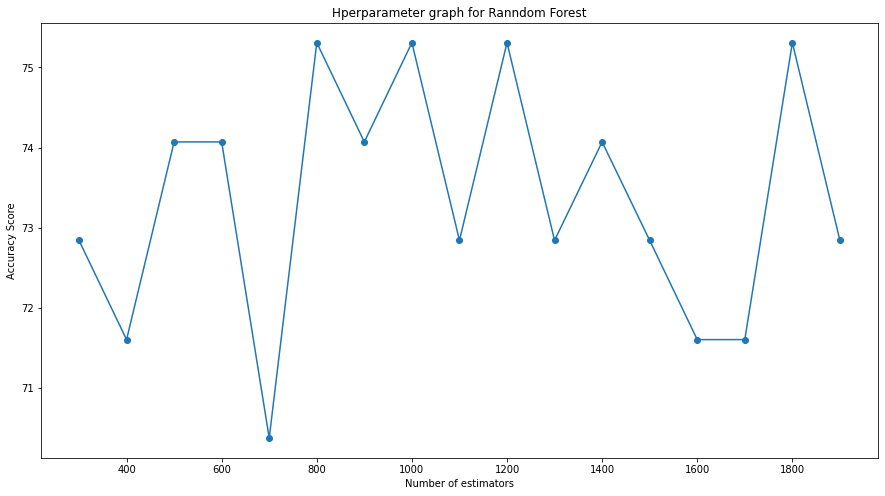

In [14]:
map = [i for i in range(300,2000,100)]
plt.figure(figsize=(15,8))
plt.title('Hperparameter graph for Ranndom Forest')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy Score')
plt.plot(map,acc,marker='o')

In [15]:
print(f'The maximum values present is {round(max(acc),2)}%')

The maximum values present is 75.31%


## Evaluation Metrices

In [16]:
# To print the Mean Absolute Error Method 
print(f"MAE of our dataset is: {mean_absolute_error(y_test,rf_predict)}")

# To print the Mean Square Error Method 
print(f"\nMSE of our dataset is: {mean_squared_error(y_test,rf_predict)}")

# To print the Root Mean Square Error Method
print(f'\nRMSE of our dataset is: {np.sqrt(mean_squared_error(y_test,rf_predict))}')

# To print F1 score
'''Usage of weighted param is because it assess the observations for each label and find their average support weighted.'''
print(f'\nF1 score for our dataset is: {f1_score(y_test, rf_predict, average="weighted")}')

MAE of our dataset is: 0.2839506172839506

MSE of our dataset is: 0.2839506172839506

RMSE of our dataset is: 0.5328701692569688

F1 score for our dataset is: 0.7104283649976239


## From above graph we can conclude that the accureacy scoroe for our Random forest at 100th estimator is {}% and after hyperparameterising our model we can say that we occured an increase in accuracy score and the score is {}% which occurs at (index position) estimator.

## Neural Network

In [17]:
bccd.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [18]:
neural = Sequential()
neural.add(Dense(12, input_dim=9, activation='relu'))
neural.add(Dense(8, activation='relu'))
neural.add(Dense(1, activation='sigmoid'))

In [19]:
neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Keras fit for BCCD dataset
neural.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
12/12 [==============================] - 0s 826us/step - loss: 3.6589 - accuracy: 0.5941
Epoch 2/200
12/12 [==============================] - 0s 885us/step - loss: 3.5027 - accuracy: 0.5835
Epoch 3/200
12/12 [==============================] - 0s 823us/step - loss: 3.4967 - accuracy: 0.4654
Epoch 4/200
12/12 [==============================] - 0s 809us/step - loss: 3.5675 - accuracy: 0.4670
Epoch 5/200
12/12 [==============================] - 0s 899us/step - loss: 2.6994 - accuracy: 0.5426
Epoch 6/200
12/12 [==============================] - 0s 984us/step - loss: 2.5148 - accuracy: 0.5255
Epoch 7/200
12/12 [==============================] - 0s 866us/step - loss: 2.7920 - accuracy: 0.5235
Epoch 8/200
12/12 [==============================] - 0s 792us/step - loss: 2.1990 - accuracy: 0.5120
Epoch 9/200
12/12 [==============================] - 0s 792us/step - loss: 1.5992 - accuracy: 0.5585
Epoch 10/200
12/12 [==============================] - 0s 938us/step - loss: 1.6198 - accura

In [21]:
# evaluate the keras model
_, accuracy = neural.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 979us/step - loss: 0.4331 - accuracy: 0.7586
Accuracy: 75.86


<BarContainer object of 2 artists>

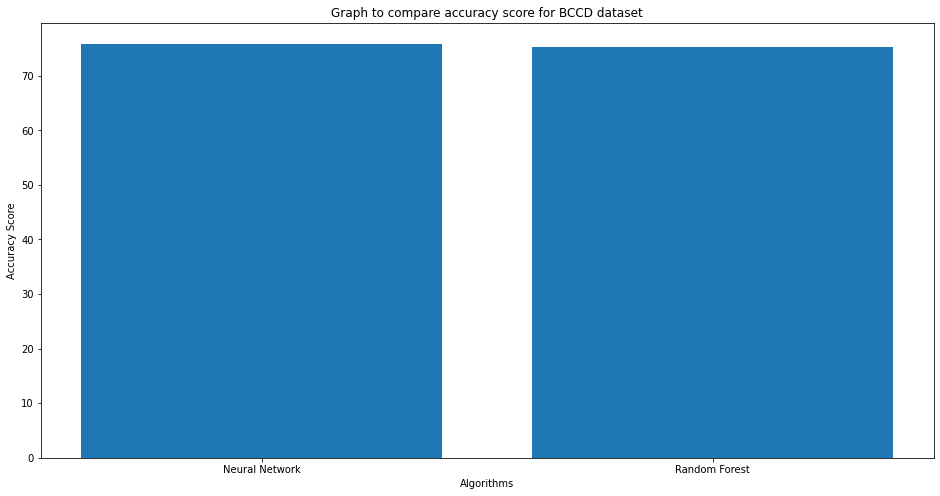

In [22]:
plt.figure(figsize=(16,8))
plt.title('Graph to compare accuracy score for BCCD dataset')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.bar(['Neural Network','Random Forest'],[accuracy*100,round(max(acc),2)])

## From the above graph we can say that Neural Network(80.17%) surpasses Random Forest(66.3%).

## Prediction based on user given input.

In [25]:
bccd.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [26]:
def predictionRandomForest(alist):
  val = rm.predict(alist) # Predicts based on the given input
  for i in val: 
    if i == 0: # if our patient result is 0 then it'll fethes as healthy
      return f'The patient is healthy.'
  return f'The patient is unhealthy.' # if our patient result is 1 then it'll fethes as unhealthy

print(predictionRandomForest([[30,59,59,10.43,4.4352,10.09,91.703,15.453,905.23]]))
print(predictionRandomForest([[20,32,42,1.43,0.4352,10.09,9.703,3.453,345.23]]))
print(predictionRandomForest([[20,40,142,45.43,0.4352,10.09,9.703,3.453,945.23]]))

The patient is healthy.
The patient is healthy.
The patient is unhealthy.


## WBCD Dataset
## Dataset Keys
## 2 --> benign (replacing it as 0)
## 4 --> malignant (replacing it as 1)

In [28]:
# To print head of our dataset 
wbcd.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [29]:
# Descirbing our dataset 
wbcd.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [30]:
# Classify our target class
wbcd.Class = wbcd.Class.replace(2,0)
wbcd.Class = wbcd.Class.replace(4,1)
wbcd.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [31]:
# Checking row type of dataset
wbcd.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

## One of our column has object where we need to change it t int64, because while training we might get some errors

In [32]:
# Removing all ascii characters and checkign our dataset shape
wbcd = wbcd[~wbcd['Bare Nuclei'].isin(["?"])]

## Downcasting our string columns to integer or converting our object to integer values.

In [33]:
wbcd = wbcd.astype(int)

## Visulaising the dataset

<AxesSubplot:title={'center':'Correlation matrix for WBCD dataset'}>

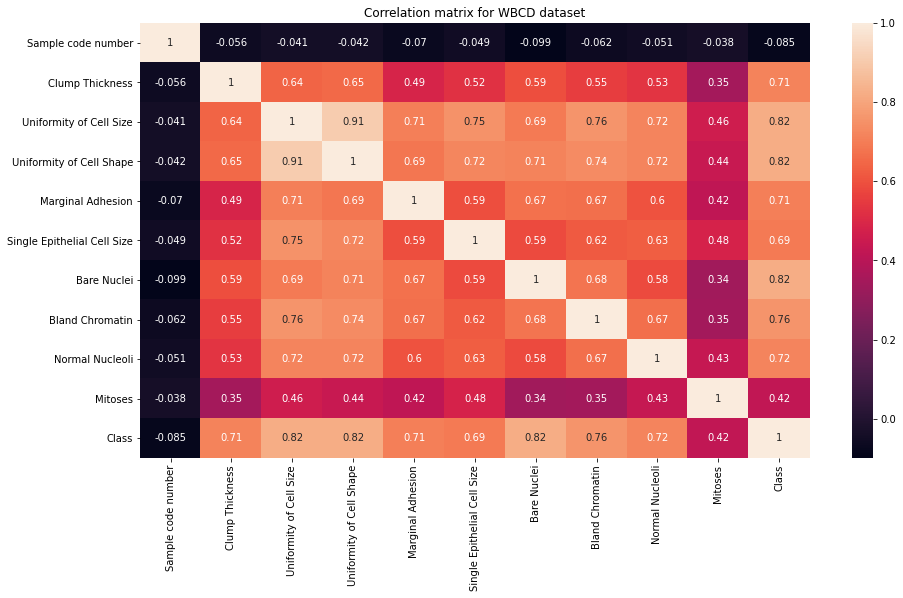

In [34]:
# To check correlation map
corr = wbcd.corr()

# Plotting correlation map
plt.figure(figsize=(15,8))
plt.title('Correlation matrix for WBCD dataset')
sns.heatmap(corr, annot = True)

# Visualising our dataset

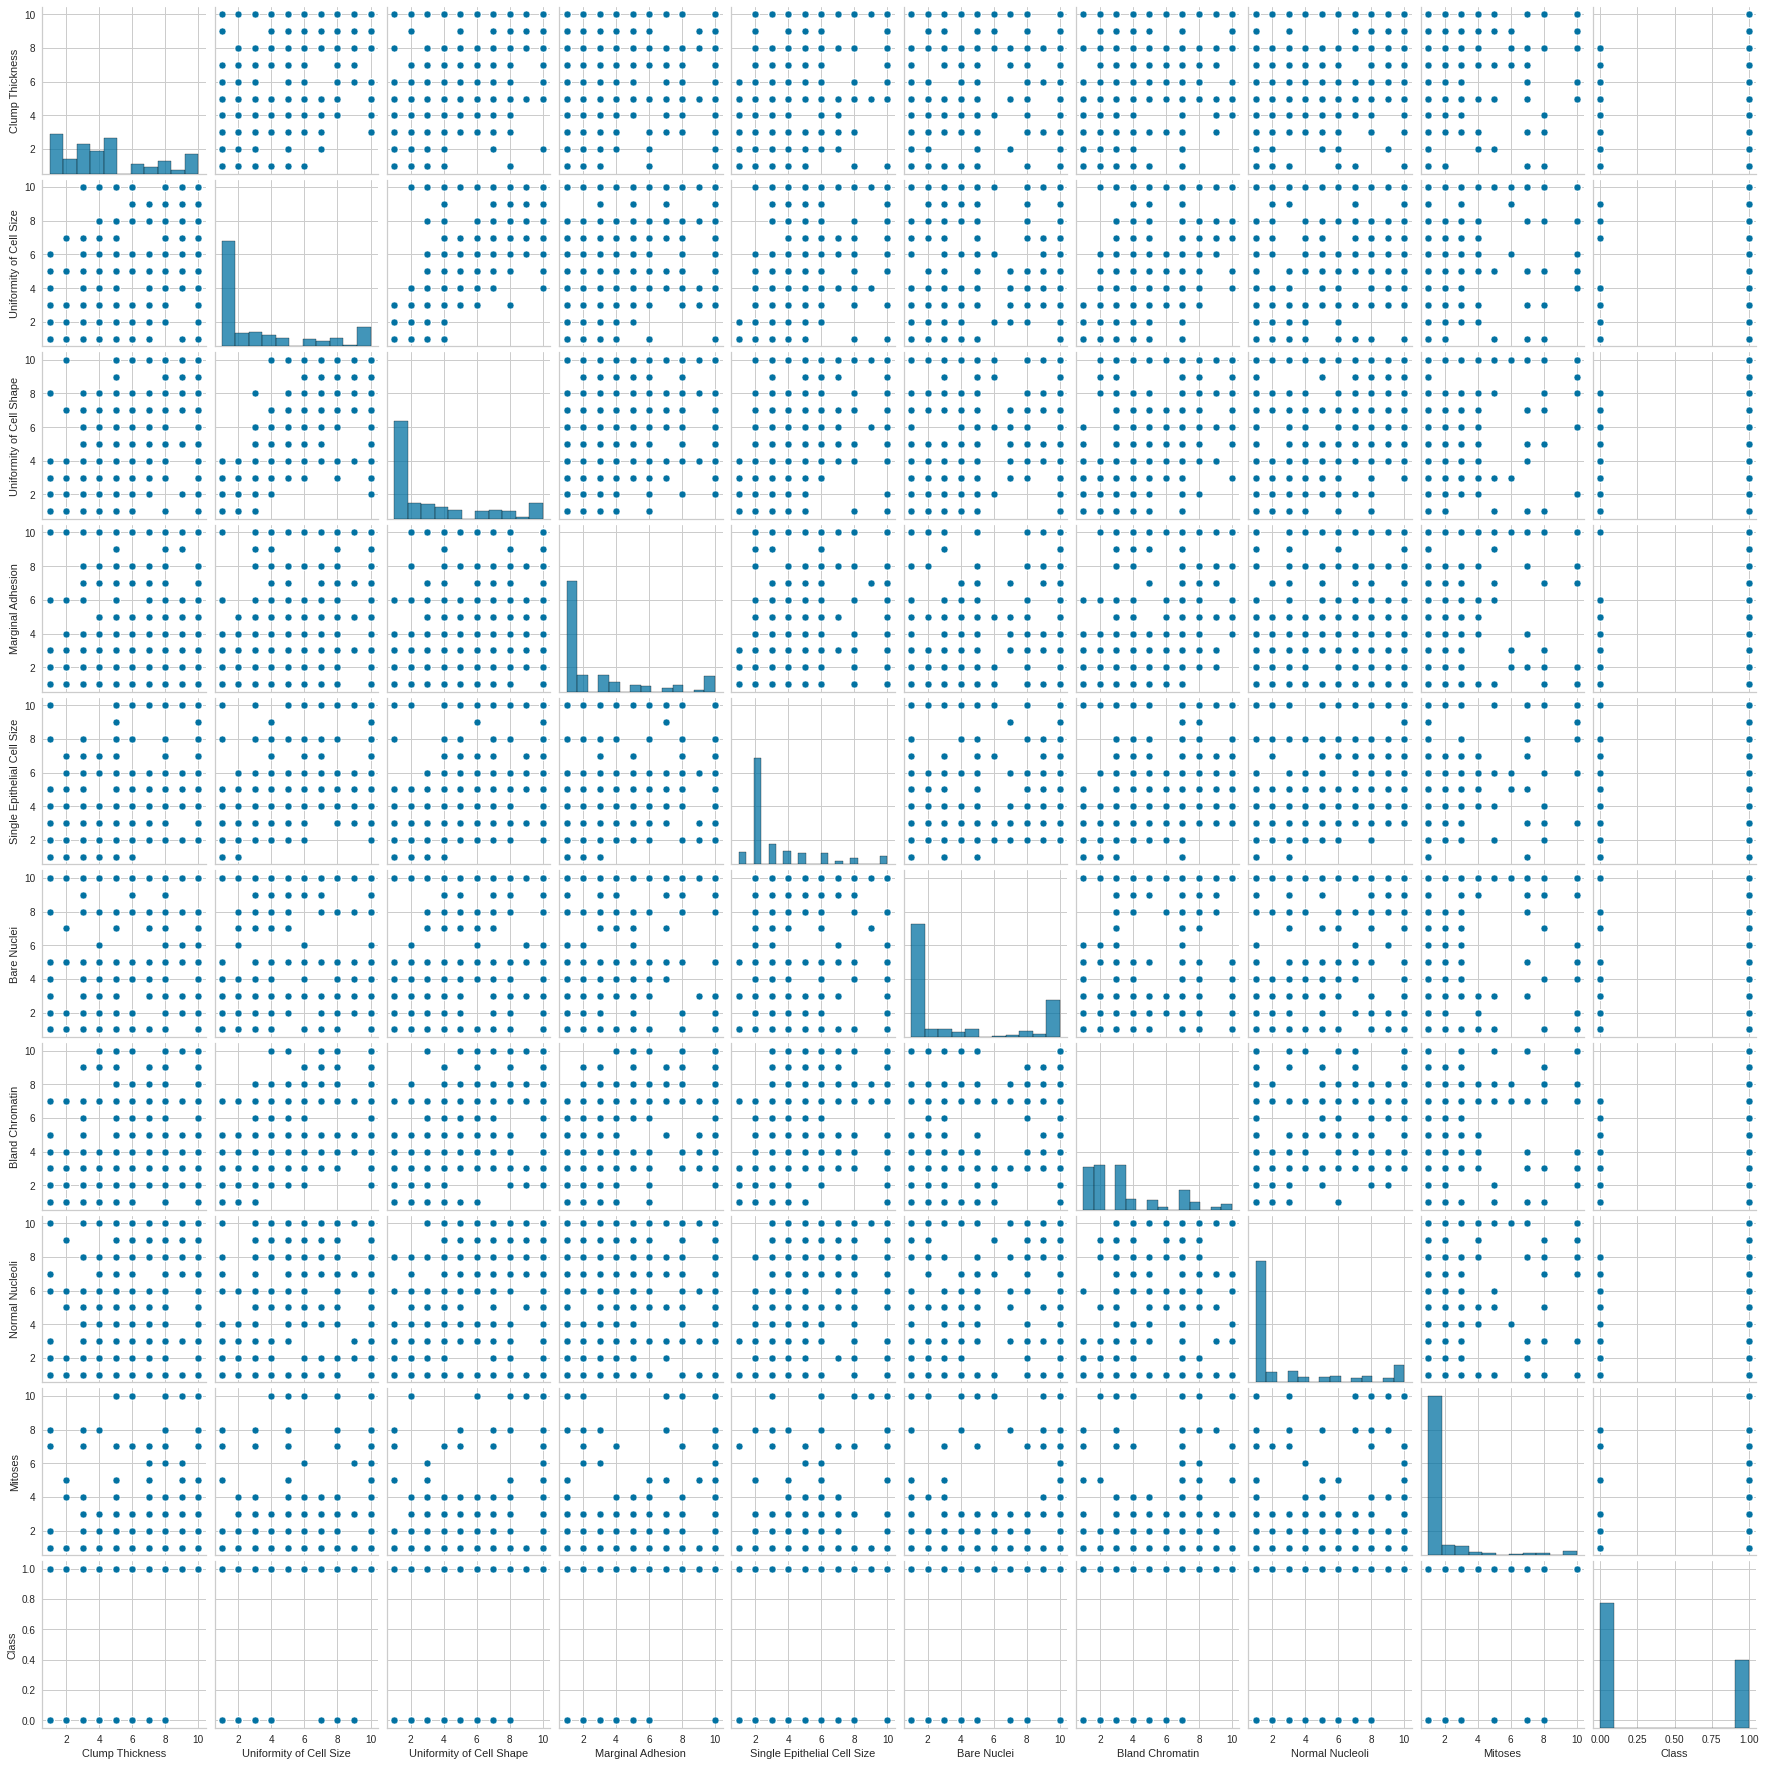

In [ ]:
# Pairplot for our WBCD Dataset
sns.pairplot(data=wbcd)

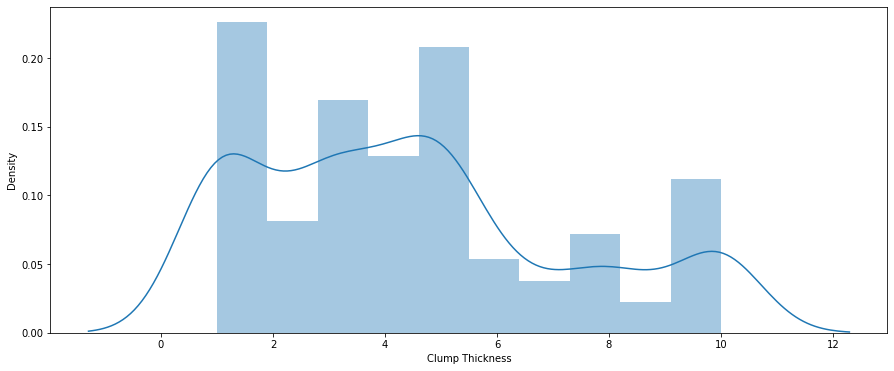

In [55]:
plt.figure(figsize=(15,6))
sns.distplot(wbcd['Clump Thickness'],kde=True)

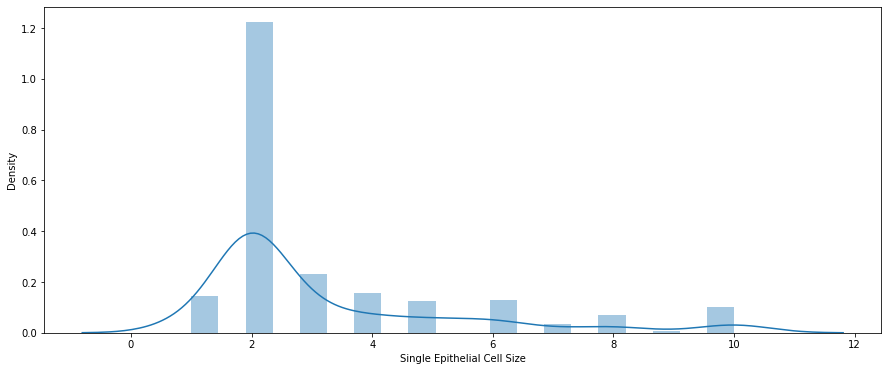

In [56]:
plt.figure(figsize=(15,6))
sns.distplot(wbcd['Single Epithelial Cell Size'],kde=True)

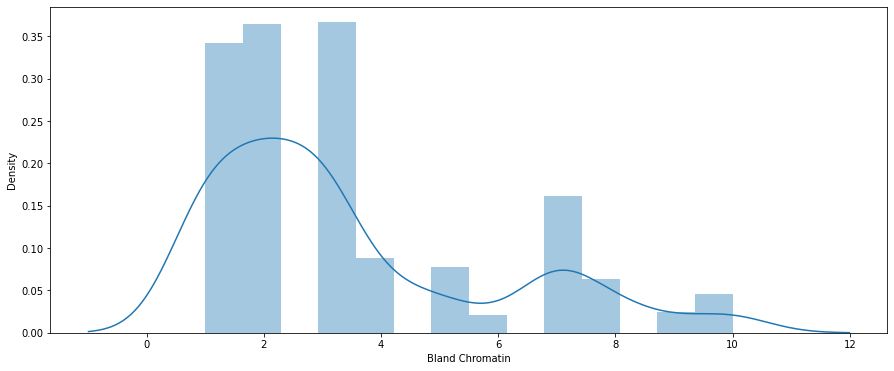

In [57]:
plt.figure(figsize=(15,6))
sns.distplot(wbcd['Bland Chromatin'],kde=True)

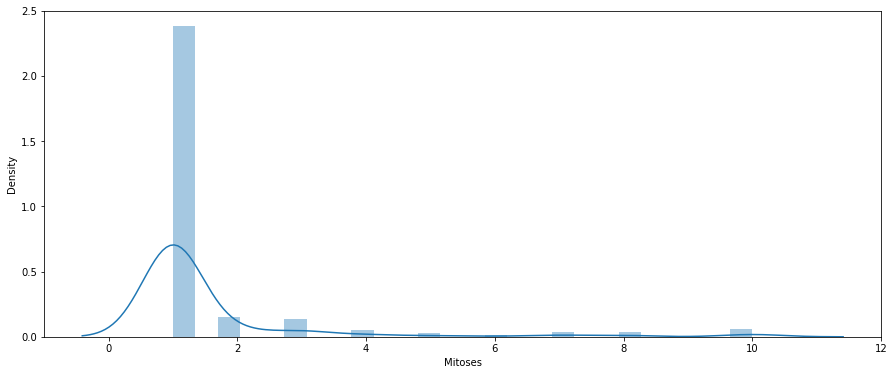

In [58]:
plt.figure(figsize=(15,6))
sns.distplot(wbcd['Mitoses'],kde=True)

## Train Test and Split the dataset

In [35]:
wbcd_X = wbcd.drop('Class',axis=1)
wbcd_y = wbcd['Class']

wbcd_X_test,wbcd_X_train,wbcd_y_test,wbcd_y_train = train_test_split(wbcd_X,wbcd_y,test_size=0.2,random_state=101)

## Random Forest

In [36]:
# Training the model
rm.fit(wbcd_X_train,wbcd_y_train)

# Predicting the model
predict_rf = rm.predict(wbcd_X_test)

In [37]:
# Printing the Classification Report.
print('Classification Report for Random Forest:' + '\n\n' + classification_report(wbcd_y_test,predict_rf))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       349
           1       0.94      0.97      0.96       197

    accuracy                           0.97       546
   macro avg       0.96      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546



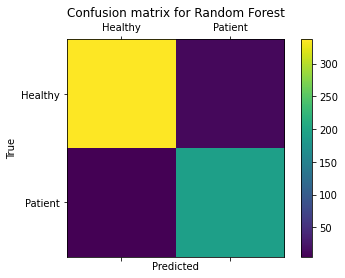

In [38]:
labels = ['Healthy', 'Patient']
cm = confusion_matrix(wbcd_y_test, predict_rf)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for Random Forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameterising our Random Forest Model

In [39]:
acc = []
def hyperParameter(alist):
    for i in alist:
        rm = RandomForestClassifier(n_estimators=i)
        rm.fit(wbcd_X_train,wbcd_y_train)
        predict = rm.predict(wbcd_X_test)
        acc.append(round(accuracy_score(wbcd_y_test,predict)*100,2))
        print(f'Accuracy score at {i}th estimator is {round(accuracy_score(wbcd_y_test,predict)*100,2)}')
hyperParameter([i for i in range(300,2000,100)])

Accuracy score at 300th estimator is 96.89
Accuracy score at 400th estimator is 97.07
Accuracy score at 500th estimator is 97.07
Accuracy score at 600th estimator is 97.07
Accuracy score at 700th estimator is 97.07
Accuracy score at 800th estimator is 97.07
Accuracy score at 900th estimator is 96.89
Accuracy score at 1000th estimator is 97.07
Accuracy score at 1100th estimator is 97.07
Accuracy score at 1200th estimator is 96.89
Accuracy score at 1300th estimator is 97.07
Accuracy score at 1400th estimator is 97.07
Accuracy score at 1500th estimator is 96.89
Accuracy score at 1600th estimator is 97.07
Accuracy score at 1700th estimator is 97.07
Accuracy score at 1800th estimator is 97.07
Accuracy score at 1900th estimator is 97.07


## Neural Network

In [40]:
wbcd_model = Sequential()
wbcd_model.add(Dense(12, input_dim=10, activation='relu'))
wbcd_model.add(Dense(8, activation='relu'))
wbcd_model.add(Dense(1, activation='sigmoid'))

In [41]:
wbcd_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Keras fit for WBCD dataset
wbcd_model.fit(wbcd_X, wbcd_y, epochs=250, batch_size=10)

Epoch 1/250
69/69 [==============================] - 0s 678us/step - loss: 70069.0192 - accuracy: 0.6175
Epoch 2/250
69/69 [==============================] - 0s 707us/step - loss: 13729.0979 - accuracy: 0.6127
Epoch 3/250
69/69 [==============================] - 0s 684us/step - loss: 157.3716 - accuracy: 0.5056
Epoch 4/250
69/69 [==============================] - 0s 711us/step - loss: 93.5939 - accuracy: 0.6025
Epoch 5/250
69/69 [==============================] - 0s 693us/step - loss: 172.6050 - accuracy: 0.5962
Epoch 6/250
69/69 [==============================] - 0s 686us/step - loss: 81.7743 - accuracy: 0.5613
Epoch 7/250
69/69 [==============================] - 0s 941us/step - loss: 52.8793 - accuracy: 0.5670
Epoch 8/250
69/69 [==============================] - 0s 683us/step - loss: 67.7816 - accuracy: 0.5801
Epoch 9/250
69/69 [==============================] - 0s 777us/step - loss: 243.1399 - accuracy: 0.5169
Epoch 10/250
69/69 [==============================] - 0s 679us/step - los

In [43]:
# evaluate the keras model
_, wbcd_accuracy = wbcd_model.evaluate(wbcd_X, wbcd_y)
acc = (wbcd_accuracy*100)
print(f'Accuracy: {acc}')

22/22 [==============================] - 0s 617us/step - loss: 21.3497 - accuracy: 0.7086
Accuracy: 70.86383700370789


# Conclusion

In [44]:
bcd_score = [accuracy*100,(accuracy_score(y_test,rf_predict))*100]
wbcd_score = [acc,(accuracy_score(wbcd_y_test,predict_rf))*100]

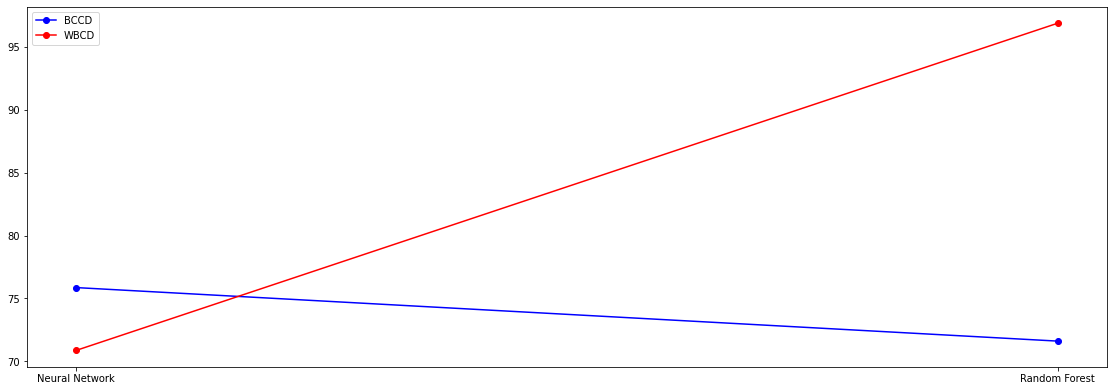

In [45]:
fig2 = plt.figure(figsize=(15,5))
ax = fig2.add_axes([0,0,1,1])
ax.plot(['Neural Network','Random Forest'],bcd_score,color='b' ,label='BCCD',marker='o')
ax.plot(['Neural Network','Random Forest'],wbcd_score,color='r' ,label='WBCD',marker='o')
ax.legend(loc='best')

## From above graph we can conclude that {which algoithm} prduces the best result for both of the datasets of {}% for BCCD dataset and {}% for WBCD dataset.